## Q1

<u><b>The function</u></b>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal):
    """
    Downsamples a sinusoidal signal to 20% while preserving max and min points.
    
    Parameters:
        signal (np.ndarray): Original sinusoidal signal.

    Returns:
        tuple:
            np.ndarray: Extreme points used for downsampling.
            np.ndarray: Downsampled signal with key points preserved.
    """
    max_point = (np.diff(np.sign(np.diff(signal))) < 0).nonzero()[0] + 1
    min_point = (np.diff(np.sign(np.diff(signal))) > 0).nonzero()[0] + 1
    extreme_points = np.sort(np.concatenate((max_point, min_point)))

    downsampled_20percent = np.arange(0, len(signal), 5)

    downsampled_with_extreme = np.unique(np.concatenate((downsampled_20percent, extreme_points)))

    final_signal = signal[downsampled_with_extreme]

    return downsampled_with_extreme, final_signal

<b><u>Verification code</u></b>

Test signal

In [8]:
t = np.arange(0, 1, 0.01)  
freq = 5  
original_signal = np.sin(2 * np.pi * freq * t)

Run the function

In [9]:
points, downsampled_signal = downsample_signal(original_signal)

Check signal length

In [10]:
print(f"Original length: {len(original_signal)}")
print(f"Downsampled length: {len(downsampled_signal)}")

Original length: 100
Downsampled length: 20


Visual check

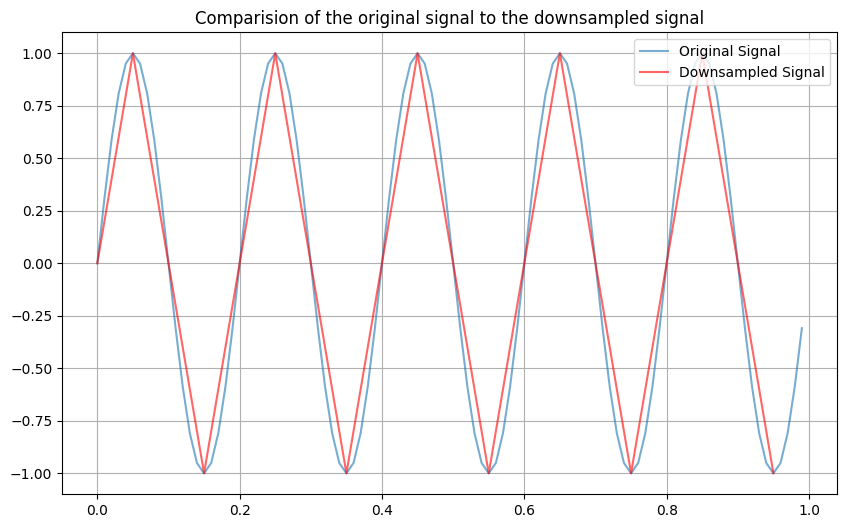

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(t, original_signal, label="Original Signal", alpha=0.6)
plt.plot(t[points], downsampled_signal, color='red', label="Downsampled Signal", alpha=0.6)
plt.legend()
plt.title("Comparision of the original signal to the downsampled signal")
plt.grid()
plt.show()